# HW #1

## Question 2.1: Probability Theory

> (10 pts) a: Implement a function, “coin_flip_prop”, that calculates the probability of having heads (ℎ) using `numpy.random.binomial(k, 𝜋, t)` = h, where k is the number of coins, 𝜋 is the probability of each coin, 𝑡 is the number of total flips, and h is head. 

> b: To confirm the `coin_flip_prop` function applicability, show that the probability reaches 0.5 as N increases from 1 to 200 when k=1. Make a visualization.  

**Imports**

In [38]:
import sys
print(f"For this hw, I used Python v{sys.version}.")

import numpy as np
import pandas as pd
np.random.seed(780)

# please don't fail me, the libraries below are only used for visualzation purposes
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

For this hw, I used Python v3.10.4 (main, Mar 31 2022, 03:38:35) [Clang 12.0.0 ].


### 2.1.a The function

In [3]:
from numpy import random as np_random

def coin_flip_prop(k: int, N: int, heads_probability=0.5) -> float:
    """
    For this binomial distribution, we set the following parameters:
        k = # of coins, aka "trials" in this experiment
        𝜋 = 0.5, or the probability of "success"
            (which in this case is landing on heads)
        N = # of flips the user wants
            --> n = 50*N, which is the total number of flips
                (aka "tests") that we shall do

    Source docs: https://numpy.org/doc/stable/reference/random/generated/numpy.random.binomial.html
    
    Returns: probability of having at least 1 heads
    """
    num_coins, num_tests = k, 50 * N
    samples_drawn = np_random.binomial(
        num_coins, heads_probability, num_tests
    )
    return sum(samples_drawn >= 1) / num_tests

In [4]:
coin_flip_prop(1, 1)  # sanity check - should be ~0.50

0.54

### 2.1.b The Visualization

In [5]:
num_flips = list(range(1, 201))
probabilities = [
    coin_flip_prop(1, flip_num) for flip_num in num_flips
]
expected_probability = [0.5 for _ in num_flips]

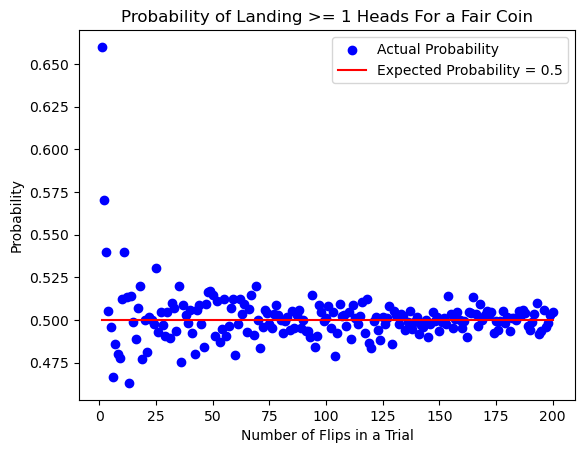

In [6]:
plt.scatter(num_flips, probabilities,
            color="blue", label="Actual Probability")
plt.plot(num_flips, expected_probability,
        color="red", label="Expected Probability = 0.5")
plt.legend()
plt.title("Probability of Landing >= 1 Heads For a Fair Coin")
plt.ylabel("Probability")
plt.xlabel("Number of Flips in a Trial")
plt.show()

As we can see above, most of the observed probabilities from each trial do indeed hover around `0.50` (with the exception of a outliers).

## Question 2.3: Average Probability

In [7]:
avg = round(sum(probabilities) / 200, 4)
print(f"The average probability across all trials where N = [1 ... 200]: {avg}.")

The average probability across all trials where N = [1 ... 200]: 0.5011.


## Question 3.1: Exploring Unlabeled Data

In [8]:
unlabelled_df = pd.read_csv("HW1_Q3.csv")
unlabelled_df.head()  # just testing if the data loaded

,var1,var2,var3
0,0.423136,0.593486,0
1,0.154896,0.450922,2
2,0.023467,0.585442,0
3,0.170294,0.386597,0
4,0.308482,0.893703,2


In [9]:
unlabelled_df["var3"].nunique()

3

I'm going to go out on a limb and guess that `var3` is supposed to be some kind of label for this dataset.
This is because unlike the other 2 features, it is discrete. And because it only has 3 unique values, it seems like the kind of thing we would want to cluster in `k = 3` groups for.

Perhaps `var1` and `var2` are predictors for `var3`? Let's use a heatmap:

/var/folders/n0/3kqw7k395kb6swksbngs7zw40000gn/T/ipykernel_18418/672460263.py:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(corr, dtype=np.bool))


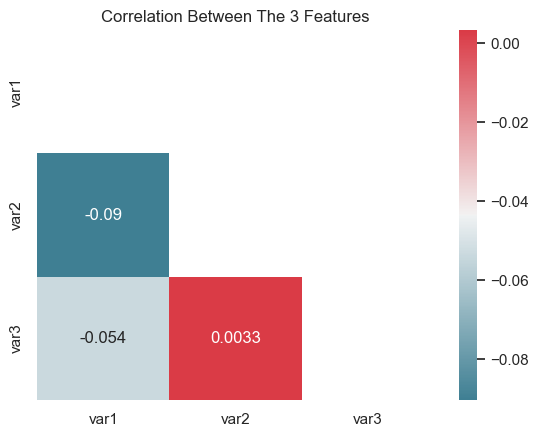

In [10]:
# Credit to the Seaborn Documentation for inspiring this cell: https://seaborn.pydata.org/examples/many_pairwise_correlations.html
sns.set(style="white")
# Compute the correlation matrix
corr = unlabelled_df.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, annot=True)
plt.title('Correlation Between The 3 Features')
plt.show()

Ok, now we can see that `var1` is relatively negatively related to `var3`, while `var2` is relatively positively correlated.

This raises another question - before I can tell what `var1` and `var2` are, it might help seeing their distributions, both individually and in regards to each other:

/Applications/anaconda3/envs/559/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Applications/anaconda3/envs/559/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


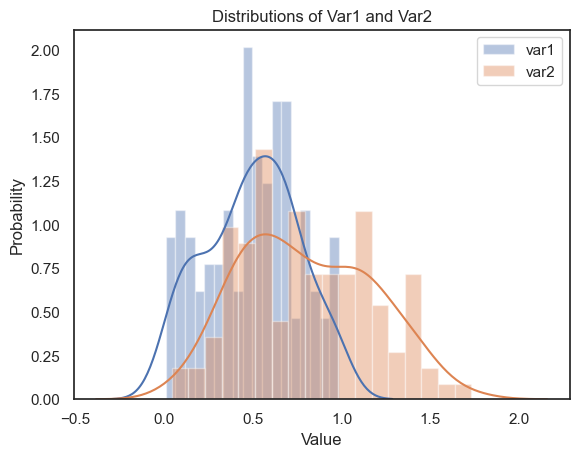

In [11]:
sns.distplot(unlabelled_df["var1"], hist=True, kde=True, bins=18, label='var1')
sns.distplot(unlabelled_df["var2"], hist=True, kde=True, bins=18, label='var2')
plt.legend()
plt.title("Distributions of Var1 and Var2")
plt.xlabel("Value")
plt.ylabel("Probability")
plt.show()

Ok so this is interesting:
- both features are within about the same interval of values, with `var2` having only a slightly larger min/max
- both appear to be somewhat Gaussian (although we could probably tease out subpopulations that would more closely resemble Gaussians)
- and there is some overlap, but not alot - we can see that some of the tallest bins for `var1` is where `var2` is the shortest, and vice versa. This further supports the negative correlation of `0.09` which we saw in the heatmap below.

Right, here's my take on what a real-life dataset might be that would resemble this:

- You have a dataset of performance logs for a large-scale, cloud-based software system that relies on a resizeable computing platform such as AWS EC 2
- `var3` shows different times we decided to 1) reduce the number of servers we currently have, 2) maintain the current number of servers, or 3) increase the number of servers running, so we could keep up with user demands on our software
- `var1` is the churn rate of our user base, at the time of the decision. This would be negative correlation, because (unfortunately) if we lose more users, then there's no need to have more servers running. 
- `var2` shows what was the aggregated load time for a single page across our servers, at the time of the decision (this would positively correlate, as longer load times means we need more servers runnning).

## Question 3.2: KMeans
> Implement a function KMeans using NumPy to cluster the data set for 
𝑘=3. 

In [57]:
from numpy.random import Generator

def myKMeans(X: pd.DataFrame, k=3) -> dict:
    """
    My implemenatation of the k-means algorithm in Python. 
    Relies heavily on NumPy and a lecture I found on MIT OCW:
        https://www.youtube.com/watch?v=esmzYhuFnds

    Returns: dict: contains the dict and covariance of each centroid
    """
    # A: init k random centroids from existing data
    rng = np.random.default_rng()
    centroids = rng.choice(X, size=(k,))
    # B: converge on optimal centroids
    keep_going = True
    
    while keep_going is True:
        centroids_assigned_pts = dict(zip(
            range(k), [[] for _ in range(k)]  # scalars mapped to 2D arrays
        ))
        # 1: assign each point to a centroid
        for sample in X:
            centroid_assignment = np.argmin([
                np.linalg.norm(sample - centroids, axis=1)  # Euclidean distance
            ])
            centroids_assigned_pts[centroid_assignment].append(sample)
        # 2: update centroid placements themselves
        cap = centroids_assigned_pts  # just an abbreviation
        new_centroids = np.array([
            np.mean(np.array(cap[centroid_label]), axis=0)
            for centroid_label in centroids_assigned_pts.keys()
        ])
        # 3: decide if we should continue
        if np.equal(centroids, new_centroids).all():
            keep_going = False
        centroids = new_centroids[:]

    # C: collect the results
    centroid_coords_cov = dict()
    for centroid_label in centroids_assigned_pts:
        centroid_coords_cov[centroid_label] = (
            centroids[centroid_label],
            np.cov(centroids_assigned_pts[centroid_label], rowvar=False)
        )
    return centroid_coords_cov



## Question 3.3: KMeans
> Using `myKMeans`, report the centroid and covariance of each cluster. 

In [58]:
predictor_data = X = np.array(unlabelled_df[["var1", "var2"]])
model_results = myKMeans(predictor_data)

In [59]:
for label, results in model_results.items():
    print(f"======= Group {label} ========")
    print(f"Centroid (coords): {results[0]}")
    print(f"Covariance (matrix): {results[1]}")

======= Group 0 ========
Centroid (coords): [0.27346395 0.66211803]
Covariance (matrix): [[0.03170869 0.00439076]
 [0.00439076 0.03928884]]
======= Group 1 ========
Centroid (coords): [0.52728026 1.21256923]
Covariance (matrix): [[0.02342228 0.00433896]
 [0.00433896 0.03548548]]
======= Group 2 ========
Centroid (coords): [0.79850461 0.45588976]
Covariance (matrix): [[ 0.0167771  -0.00924281]
 [-0.00924281  0.04317508]]


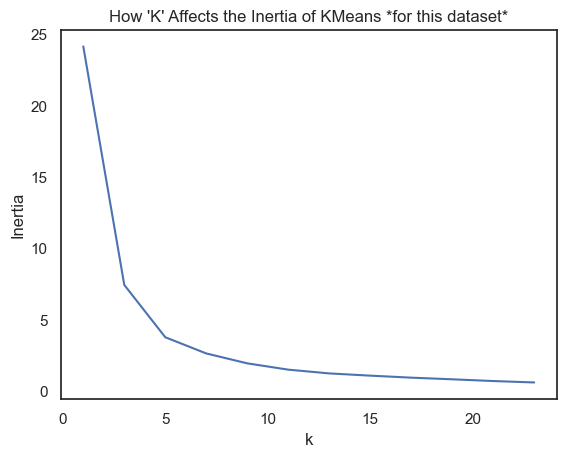

In [60]:
from sklearn.cluster import KMeans

# Credit to Prof. Toutounchian of Drexel for inspiring this code: 
# https://github.com/UPstartDeveloper/DS-2.1-Machine-Learning/blob/master/Notebooks/remote_simple_kmeans.ipynb
inertias = []
K = range(1, 25, 2)
for potential_k in K:
    # fit the k-means for a given k to the data (X)
    model = KMeans(n_clusters=potential_k)
    model.fit(predictor_data)
    # record the inertia
    inertias.append(model.inertia_)

# Plot the elbow 
plt.plot(K, inertias)
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title("How 'K' Affects the Inertia of KMeans *for this dataset*")
plt.show()

As we can see from this plot, the optimal value of `k` for our clustering algorithm is about 5.

## Question 4: Exploratory Data Analysis

### 4.1: Loading + merging data

In [180]:
gdp = pd.read_csv("GDP.csv", encoding_errors="ignore")  # I think the data got messed up somehow
print(gdp.shape)   # but it looks like we got all the useful rows, so it should be ok
gdp.head()  # lot of nan I think

(330, 10)


,Unnamed: 0,Gross domestic product 2012,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,(millions of,NaN,NaN,NaN,NaN,NaN
2,NaN,Ranking,NaN,Economy,US dollars),NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,USA,1,NaN,United States,"16,244,600",NaN,NaN,NaN,NaN,NaN


In [181]:
countries = pd.read_csv("Country.csv", encoding_errors="ignore")  # I think the data got messed up somehow
print(countries.shape)   # but it looks like we got most of the rows
countries.tail()

(234, 31)


,CountryCode,Long Name,Income Group,Region,Lending category,Other groups,Currency Unit,Latest population census,Latest household survey,Special Notes,...,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,2-alpha code,WB-2 code,Table Name,Short Name
229,YEM,Republic of Yemen,Lower middle income,Middle East & North Africa,IDA,NaN,Yemeni rial,2004,"MICS, 2006",NaN,...,"ES/BS, 2005",NaN,2002,2005.0,2008.0,2000.0,YE,RY,"Yemen, Rep.",Yemen
230,ZAF,Republic of South Africa,Upper middle income,Sub-Saharan Africa,IBRD,NaN,South African rand,2001,"DHS, 2003",Fiscal year end: March 31; reporting period fo...,...,"ES/BS, 2000",NaN,2000,2005.0,2008.0,2000.0,ZA,ZA,South Africa,South Africa
231,ZAR,Democratic Republic of the Congo,Low income,Sub-Saharan Africa,IDA,HIPC,Congolese franc,1984,DHS 2007,NaN,...,"1-2-3, 2005-06",NaN,1990,NaN,1986.0,2000.0,CD,ZR,"Congo, Dem. Rep.",Dem. Rep. Congo
232,ZMB,Republic of Zambia,Low income,Sub-Saharan Africa,IDA,HIPC,Zambian kwacha,2000,"DHS, 2007",NaN,...,"IHS, 2004-05",NaN,1990,NaN,2008.0,2000.0,ZM,ZM,Zambia,Zambia
233,ZWE,Republic of Zimbabwe,Low income,Sub-Saharan Africa,Blend,NaN,Zimbabwe dollar,2002,"DHS, 2005/06",Fiscal year end: June 30; reporting period for...,...,NaN,NaN,1960,1995.0,2008.0,2002.0,ZW,ZW,Zimbabwe,Zimbabwe


In [182]:
# before the merge, fix up the column names + nan values
gdp.rename(columns = {
    "Unnamed: 0": "CountryCode",
    "Gross domestic product 2012": "Ranking",
    "Unnamed: 3": "Economy",
    "Unnamed: 4": "(millions of US dollars",
}, inplace=True)
gdp.head(15)

,CountryCode,Ranking,Unnamed: 2,Economy,(millions of US dollars,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,(millions of,NaN,NaN,NaN,NaN,NaN
2,NaN,Ranking,NaN,Economy,US dollars),NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,USA,1,NaN,United States,"16,244,600",NaN,NaN,NaN,NaN,NaN
5,CHN,2,NaN,China,"8,227,103",NaN,NaN,NaN,NaN,NaN
6,JPN,3,NaN,Japan,"5,959,718",NaN,NaN,NaN,NaN,NaN
7,DEU,4,NaN,Germany,"3,428,131",NaN,NaN,NaN,NaN,NaN
8,FRA,5,NaN,France,"2,612,878",NaN,NaN,NaN,NaN,NaN
9,GBR,6,NaN,United Kingdom,"2,471,784",NaN,NaN,NaN,NaN,NaN


In [183]:
# need to get rid of top 4 rows, and last 5 columns
gpd_clean_rows = gdp.dropna(axis=0, subset=[
    '(millions of US dollars', 'CountryCode', 'Ranking'
])
gdp_clean_rows_and_cols = gpd_clean_rows.dropna(axis=1)
gdp_clean_rows_and_cols.head()

,CountryCode,Ranking,Economy,(millions of US dollars
4,USA,1,United States,"16,244,600"
5,CHN,2,China,"8,227,103"
6,JPN,3,Japan,"5,959,718"
7,DEU,4,Germany,"3,428,131"
8,FRA,5,France,"2,612,878"


In [184]:
economies_df = pd.merge(gdp_clean_rows_and_cols, countries, on="CountryCode")
economies_df.head()

,CountryCode,Ranking,Economy,(millions of US dollars,Long Name,Income Group,Region,Lending category,Other groups,Currency Unit,...,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,2-alpha code,WB-2 code,Table Name,Short Name
0,USA,1,United States,"16,244,600",United States of America,High income: OECD,North America,NaN,NaN,U.S. dollar,...,LFS 2000,Yes,1997/2002,2004.0,2008.0,2000.0,US,US,United States,United States
1,CHN,2,China,"8,227,103",People's Republic of China,Lower middle income,East Asia & Pacific,IBRD,NaN,Chinese yuan,...,"IHS, 2005",NaN,1997,2005.0,2008.0,2000.0,CN,CN,China,China
2,JPN,3,Japan,"5,959,718",Japan,High income: OECD,East Asia & Pacific,NaN,NaN,Japanese yen,...,"IS, 1993",Yes,2000,2004.0,2008.0,2000.0,JP,JP,Japan,Japan
3,DEU,4,Germany,"3,428,131",Federal Republic of Germany,High income: OECD,Europe & Central Asia,NaN,Euro area,Euro,...,"IHS, 2000",Yes,1999-2000,2004.0,2008.0,2000.0,DE,DE,Germany,Germany
4,FRA,5,France,"2,612,878",French Republic,High income: OECD,Europe & Central Asia,NaN,Euro area,Euro,...,"ES/BS, 1994/95",Yes,1999-2000,2004.0,2008.0,2000.0,FR,FR,France,France


Now, to answer the question:

In [185]:
num_countries = economies_df['CountryCode'].nunique()
print(f"The number of countries I merged was: {num_countries}.")

The number of countries I merged was: 189.


### 4.2: Regional Analysis

First things first: what exactly is a "region" in the context of this dataset?
So far, all I can tell is that there is a column named `"Region"` in the DataFrame.

In [186]:
economies_df["Region"].unique()

array(['North America', 'East Asia & Pacific', 'Europe & Central Asia',
       'Latin America & Caribbean', 'South Asia',
       'Middle East & North Africa', 'Sub-Saharan Africa'], dtype=object)

In [187]:
countries_per_region = economies_df.value_counts("Region")

Sweet, now let's visualize this:

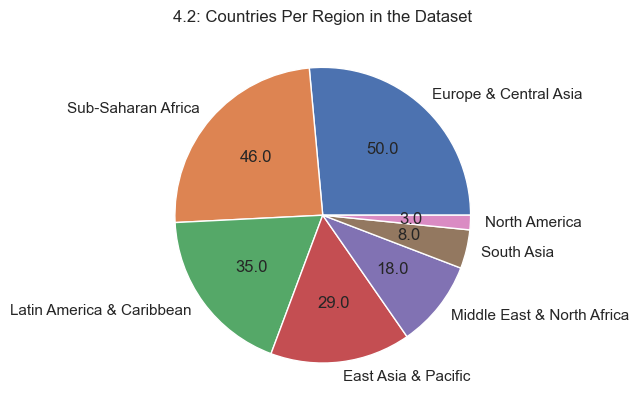

In [188]:
region_names = countries_per_region.index.values
get_absolute_val = lambda percent_val: round(
    percent_val * countries_per_region.values.sum() / 100.
, 0)
plt.pie(countries_per_region.values, labels=region_names, autopct=get_absolute_val)
plt.title("4.2: Countries Per Region in the Dataset")
plt.show()

In [189]:
countries_per_region

Region
Europe & Central Asia         50
Sub-Saharan Africa            46
Latin America & Caribbean     35
East Asia & Pacific           29
Middle East & North Africa    18
South Asia                     8
North America                  3
dtype: int64

As we can see from above, the region with the most countries is "Europe and Central Asia", having a value of `50`; and the one with the least is "North America", which has only `3`.

### Question 4.3: KS Test

First step - let's see if we can slice the dataset so that can see the set of GDP values (in millions of USD) per region:

In [248]:
region_gdp_dist = dict()
for region_name in economies_df["Region"].values:
    region_gdp_dist[region_name] = np.array(
        economies_df[economies_df["Region"] == region_name]["(millions of US dollars"].values,
    )

In [249]:
region_gdp_dist

{'North America': array([' 16,244,600 ', ' 1,821,424 ', ' 5,474 '], dtype=object),
 'East Asia & Pacific': array([' 8,227,103 ', ' 5,959,718 ', ' 1,532,408 ', ' 1,129,598 ',
        ' 878,043 ', ' 365,966 ', ' 305,033 ', ' 274,701 ', ' 263,259 ',
        ' 250,182 ', ' 167,347 ', ' 155,820 ', ' 43,582 ', ' 16,954 ',
        ' 15,654 ', ' 14,038 ', ' 10,271 ', ' 9,418 ', ' 3,908 ',
        ' 1,293 ', ' 1,008 ', ' 787 ', ' 684 ', ' 472 ', ' 326 ', ' 228 ',
        ' 182 ', ' 175 ', ' 40 '], dtype=object),
 'Europe & Central Asia': array([' 3,428,131 ', ' 2,612,878 ', ' 2,471,784 ', ' 2,014,775 ',
        ' 2,014,670 ', ' 1,322,965 ', ' 789,257 ', ' 770,555 ',
        ' 631,173 ', ' 523,806 ', ' 499,667 ', ' 489,795 ', ' 483,262 ',
        ' 394,708 ', ' 314,887 ', ' 249,099 ', ' 247,546 ', ' 212,274 ',
        ' 210,771 ', ' 203,521 ', ' 196,446 ', ' 192,711 ', ' 176,309 ',
        ' 124,600 ', ' 91,149 ', ' 66,605 ', ' 63,267 ', ' 59,228 ',
        ' 55,178 ', ' 51,113 ', ' 50,972 ', ' 

Yikes! It looks like none of the GDP values were actually parsed as `int` or `float` values. Let's change this:

In [252]:
# Credit for using locale-based parsing goes to "unutbu", on Stack Overflow: https://stackoverflow.com/questions/1779288/how-to-convert-a-string-to-a-number-if-it-has-commas-in-it-as-thousands-separato
import locale
locale.setlocale(locale.LC_ALL, 'en_US.UTF-8' ) 

region_gdp_dist2 = dict()
for region, gdp_strs in region_gdp_dist.items():
    gdp_floats = np.array([
        locale.atoi(gdp_str) for gdp_str in gdp_strs
    ], dtype=np.float32)

    region_gdp_dist2[region] = gdp_floats

In [253]:
region_gdp_dist2["North America"]  # sanity check

array([1.624460e+07, 1.821424e+06, 5.474000e+03], dtype=float32)

**Doing the Test**

Ok, so to find out the similar regions we will use a 2-sampled KS Test. 
The null hypothesis states that the two regions we are comparing come are part of the same distribution, and are thus similar.
We will try to reject this hypothesis by seeing if the p-value (computed by the test) is < 0.05. 

In [299]:
import itertools as it  # makes it simpler to find all the pairs we need to test
from scipy import stats

def check_region_gdp_distributions(region_gdp_dict):
    '''Captures the pairs of regions where we fail to reject the null hypothesis.'''
    similar_pairs = set()
    pairs = it.combinations(region_gdp_dict.keys(), 2)
    num = 1  # using a number to list out the results (for readability)
    for region1, region2 in pairs:
        results = stats.ks_2samp(region_gdp_dict[region1], region_gdp_dict[region2])
        if results.pvalue > 0.05:
            similar_pairs.add((region1, region2))
            print(f"{num}. [{region1}/{region2}]: p-value is {results.pvalue}, so these regions could be similar.")
            num += 1

    return similar_pairs

In [300]:
similar_pairs1 = check_region_gdp_distributions(region_gdp_dist2)

1. [North America/East Asia & Pacific]: p-value is 0.19032258064516128, so these regions could be similar.
2. [North America/Europe & Central Asia]: p-value is 0.22479296508153346, so these regions could be similar.
3. [North America/Latin America & Caribbean]: p-value is 0.12422949265054528, so these regions could be similar.
4. [North America/South Asia]: p-value is 0.4242424242424242, so these regions could be similar.
5. [North America/Middle East & North Africa]: p-value is 0.14436090225563925, so these regions could be similar.
6. [North America/Sub-Saharan Africa]: p-value is 0.09194528875379948, so these regions could be similar.
7. [East Asia & Pacific/Latin America & Caribbean]: p-value is 0.3964121364344977, so these regions could be similar.
8. [East Asia & Pacific/South Asia]: p-value is 0.3581753221221913, so these regions could be similar.
9. [Europe & Central Asia/South Asia]: p-value is 0.6469143956348131, so these regions could be similar.
10. [Europe & Central Asia/M

### Question 4.4: Normalization + KS Test

Let's do the same deal, but first let's normalize each region's GDP vector:

In [281]:
normalize = lambda vector: (1/np.linalg.norm(vector)) * vector

In [288]:
region_gdp_dist_normalized = dict(zip(
    region_gdp_dist2.keys(),
    [normalize(gdp) for gdp in region_gdp_dist2.values()]
))

In [289]:
similar_pairs_norm = check_region_gdp_distributions(region_gdp_dist_normalized)

1. [North America/East Asia & Pacific]: p-value is 0.252016129032258, so these regions could be similar.
2. [North America/Europe & Central Asia]: p-value is 0.3496115427302997, so these regions could be similar.
3. [North America/Latin America & Caribbean]: p-value is 0.32432432432432423, so these regions could be similar.
4. [North America/South Asia]: p-value is 0.709090909090909, so these regions could be similar.
5. [North America/Middle East & North Africa]: p-value is 0.9060150375939849, so these regions could be similar.
6. [North America/Sub-Saharan Africa]: p-value is 0.21113764654798084, so these regions could be similar.
7. [East Asia & Pacific/South Asia]: p-value is 0.1774226184093355, so these regions could be similar.
8. [Europe & Central Asia/Latin America & Caribbean]: p-value is 0.28600678148733794, so these regions could be similar.
9. [Europe & Central Asia/South Asia]: p-value is 0.8648726985823698, so these regions could be similar.
10. [Europe & Central Asia/Sub

Ok now for the real question - did normalization change the results of the KS-test?

In [301]:
similar_pairs_unnormalized = similar_pairs1

In [302]:
similar_pairs_norm - similar_pairs_unnormalized

{('Europe & Central Asia', 'Latin America & Caribbean'),
 ('Europe & Central Asia', 'Sub-Saharan Africa'),
 ('Latin America & Caribbean', 'Sub-Saharan Africa')}

In [303]:
similar_pairs_unnormalized - similar_pairs_norm

{('East Asia & Pacific', 'Latin America & Caribbean'),
 ('Europe & Central Asia', 'Middle East & North Africa')}

In short, the answer is yes. As we can see above, there are a few differences between our KS test results on the original and normalized data. For example:
- from the above 2 cells, we can see that when we used normalization, the "Europe & Central Asia" region appeared to be similar to that of the "Latin America..." and "Sub-Saharan Africa". And "Latin America..." was similar to "Sub-Saharan Africa" as well.
- also, in total there were 14 similar pairs after normalizing, as opposed to the (only) 13 pairs we found when we did not

One possible explanation for this behavior is because when we normalized the GDP vectors, we effectively gave them all a magnitude equivalent to that of the unit vector. This intuitively makes them all more similar - as now, the only way that vector can be different from the other is by having a different direction. This is perhaps why we saw more overall similarities after normalizing.  

But looking at the cell above, we have another question: why is it that there were some pairs that seemed to be similar when we did not normalize (i.e. in `similar_pairs_unnormalized`), that no longer appeared to be so when we did (aka in `similar_pairs_norm`)? To be honest I am not sure why. Could just be a bug in the code for `scipy.stats.ks_2samp`.